In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [5]:
ff=pd.read_csv(r'C:\Users\DAKSHIN\Desktop\PGP Analytics\Capstone projects\covtype.csv')

## Checking Info and Statistics of Data

**Cover_type(Target Variable) includes types of trees**

1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz

In [7]:
ff.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [8]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [9]:
ff.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
ff.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


**Visualisation** 

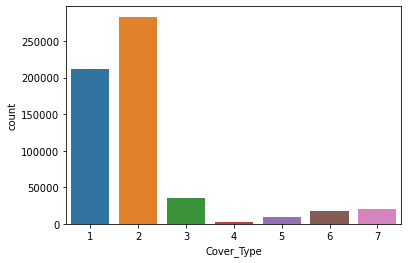

In [16]:
#count plot of target
sb.countplot(x='Cover_Type', data=ff)
plt.show()

**Distance**

In [19]:
Distance=['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']

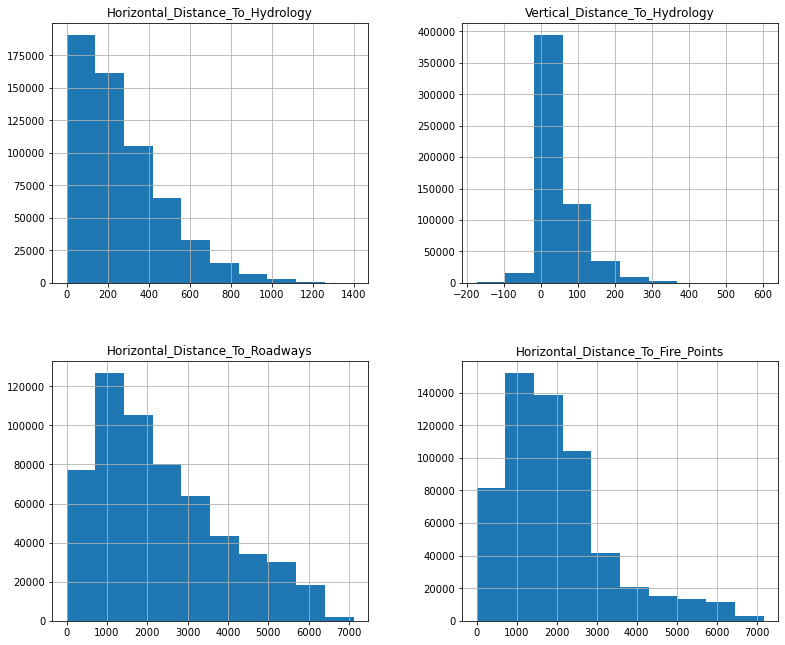

In [21]:
D_viz = ff[Distance]
D_viz.hist(figsize=(13, 11))
plt.show()

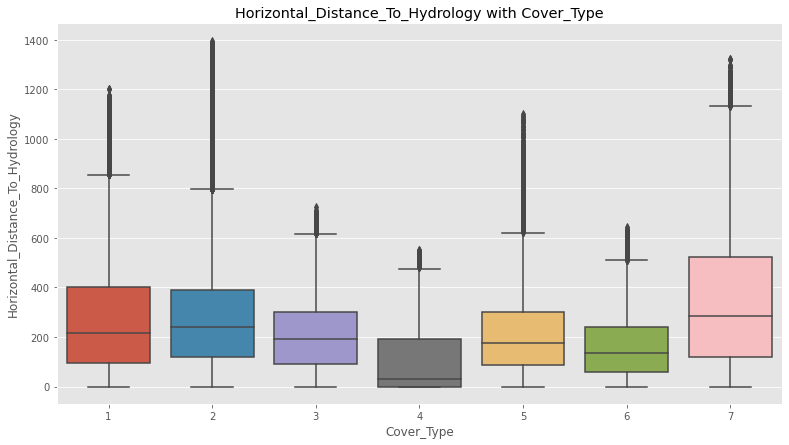

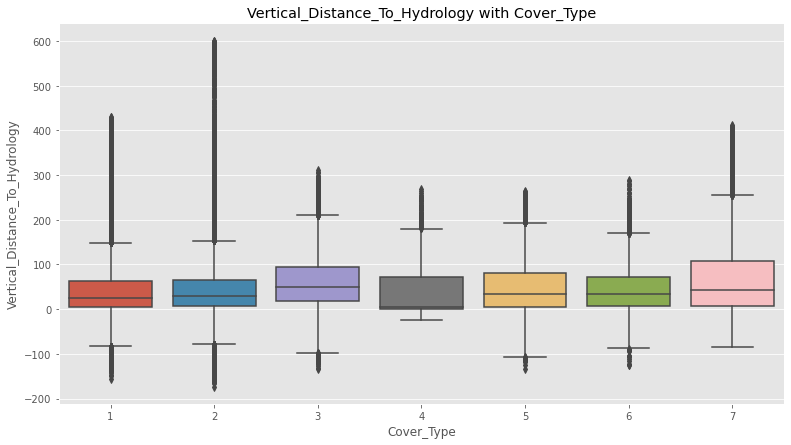

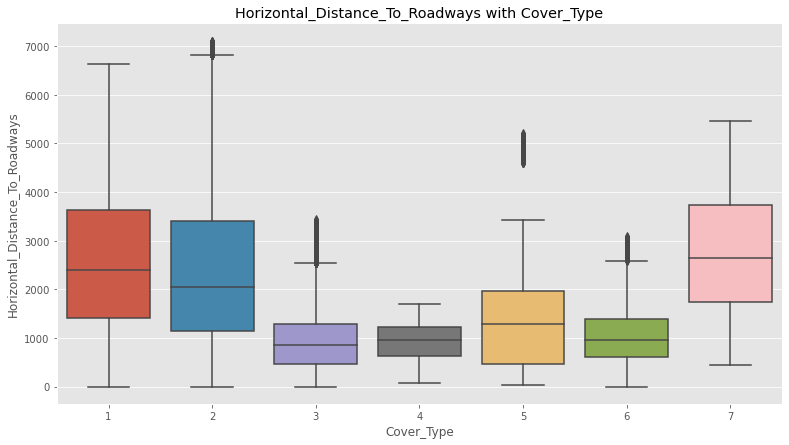

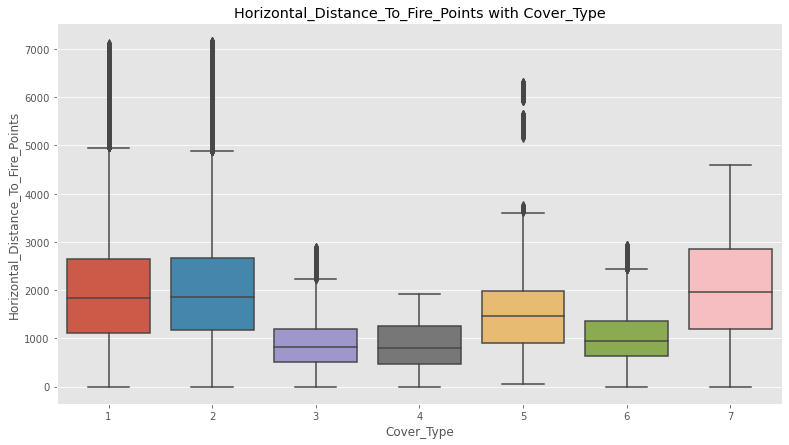

In [23]:
plt.style.use('ggplot')
for i in Distance:
    plt.figure(figsize=(13, 7))
    plt.title(str(i) + " with " + str('Cover_Type'))
    sb.boxplot(x=ff.Cover_Type, y=D_viz[i])
    plt.show()

In [24]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [25]:
s_type=['Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40',]

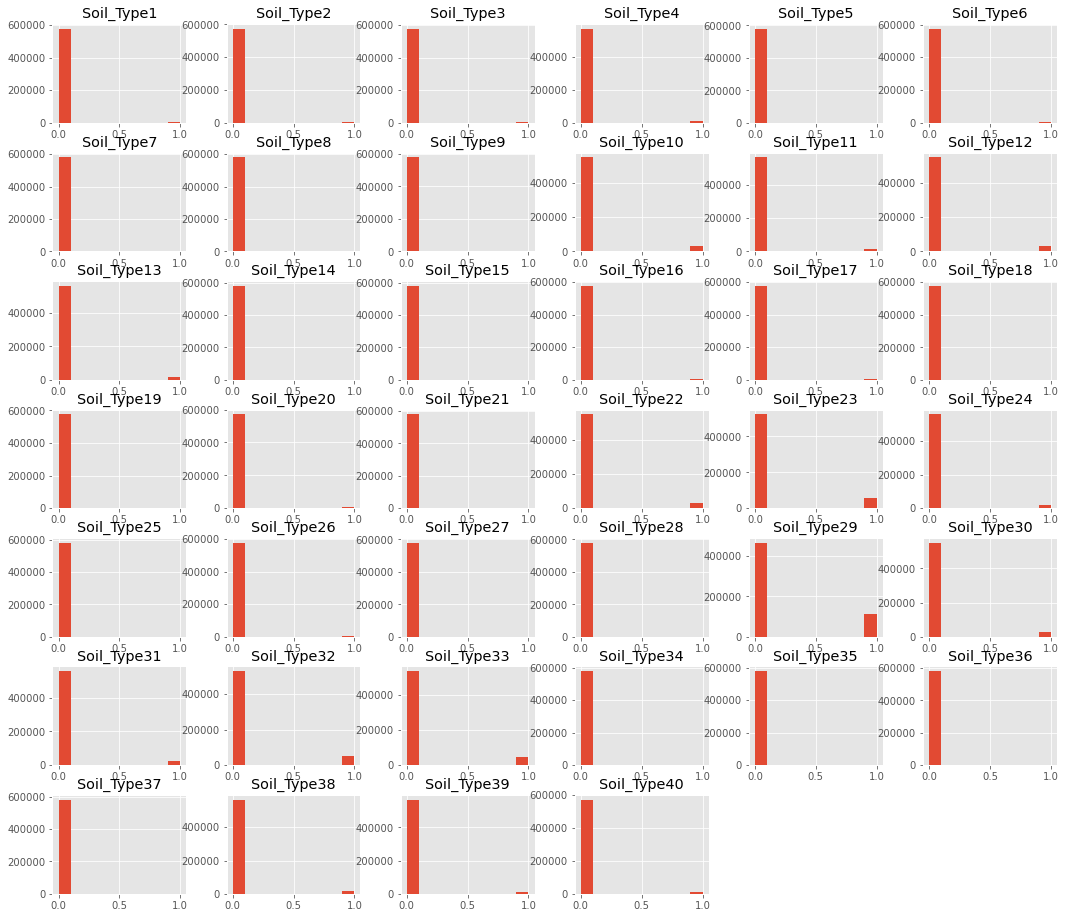

In [28]:
Soil__viz = ff[s_type]
Soil__viz.hist(figsize=(18, 16))
plt.show()

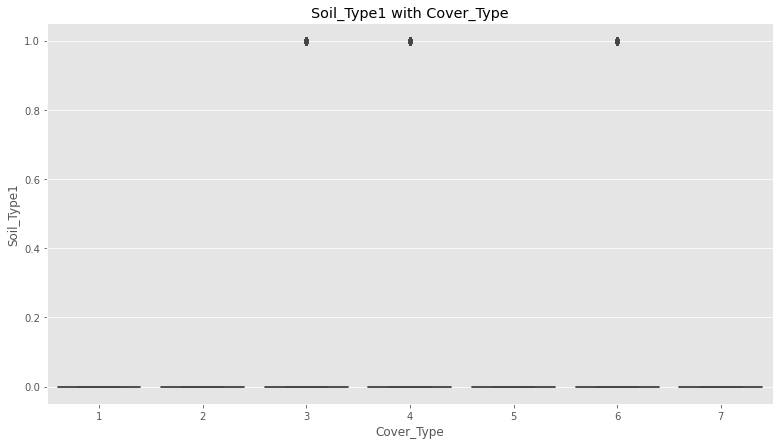

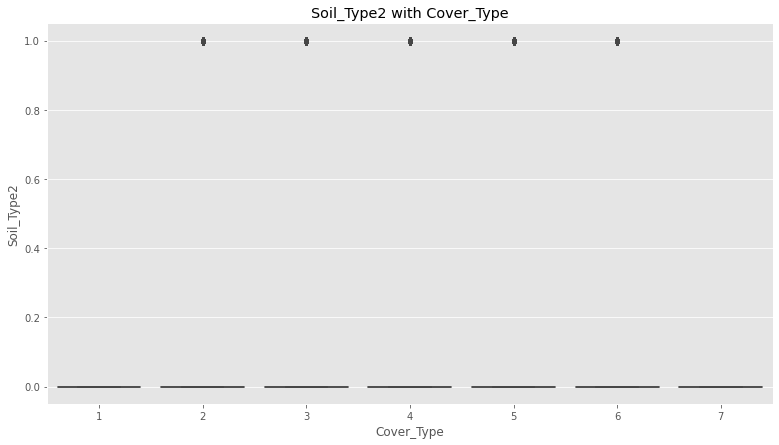

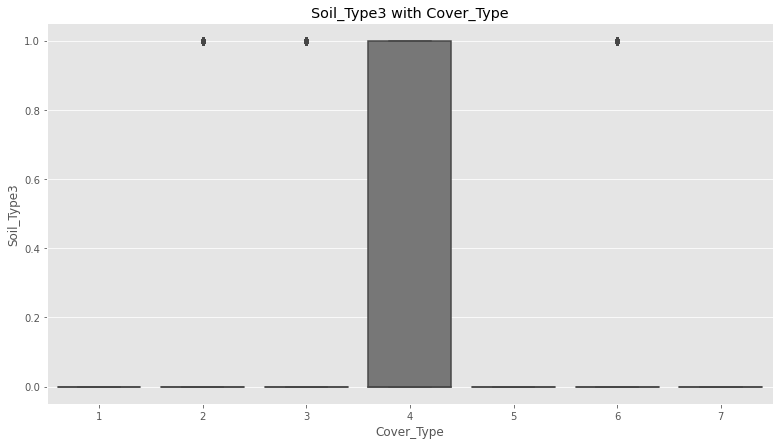

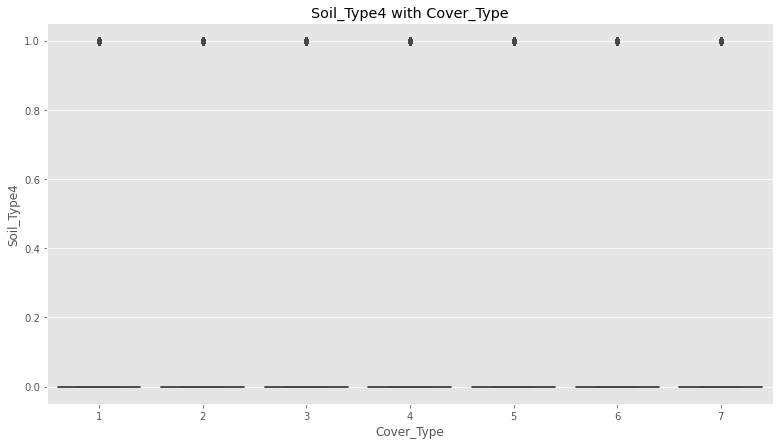

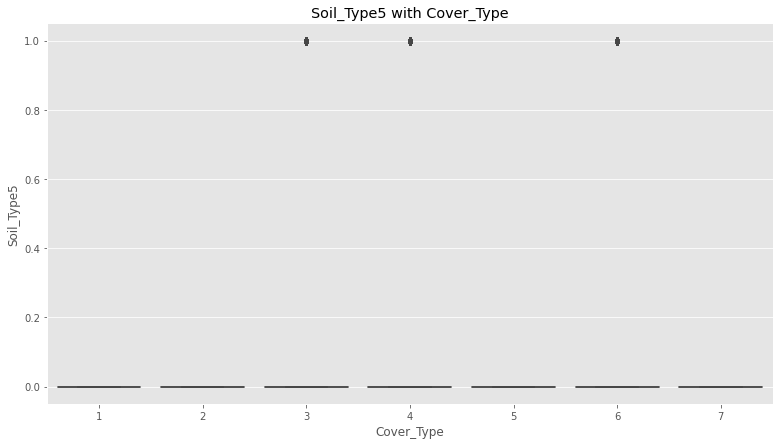

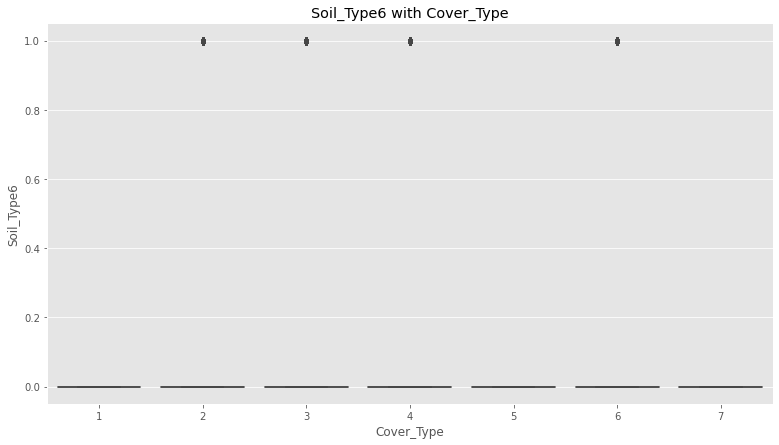

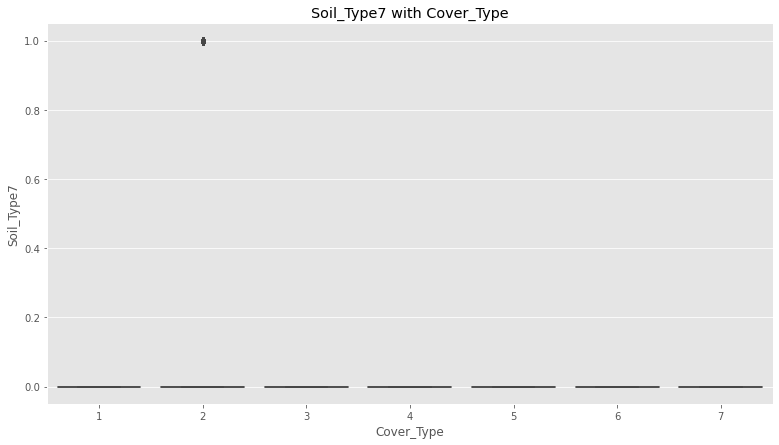

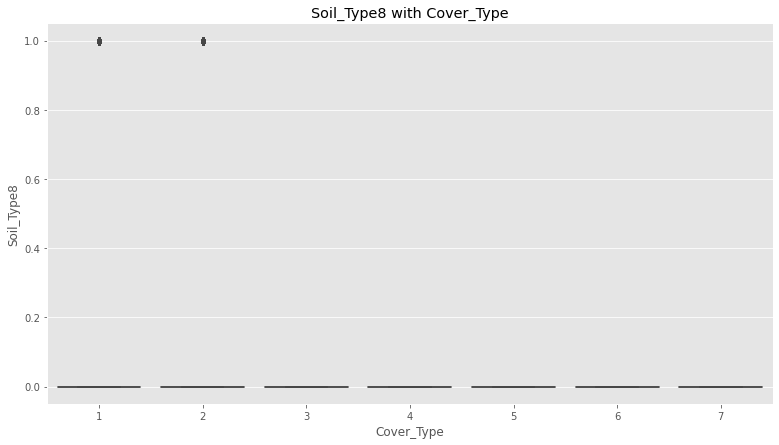

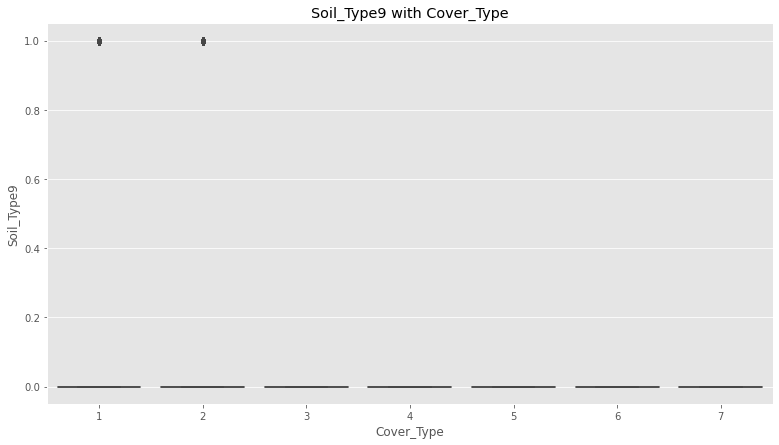

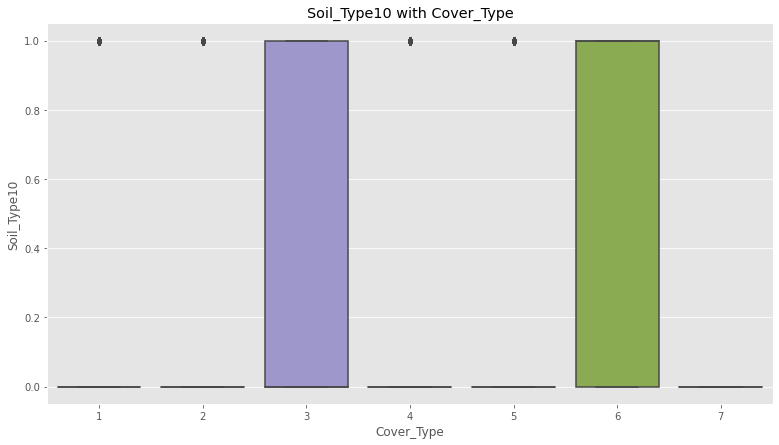

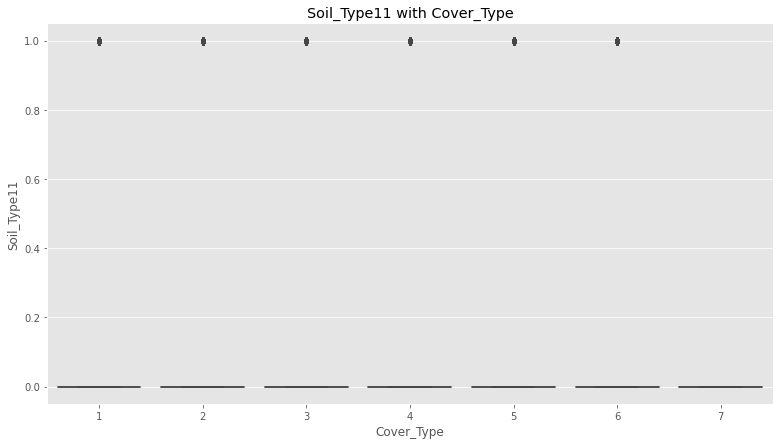

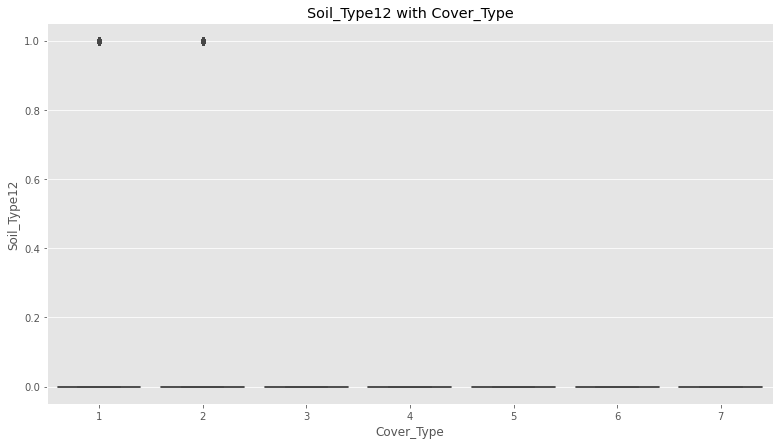

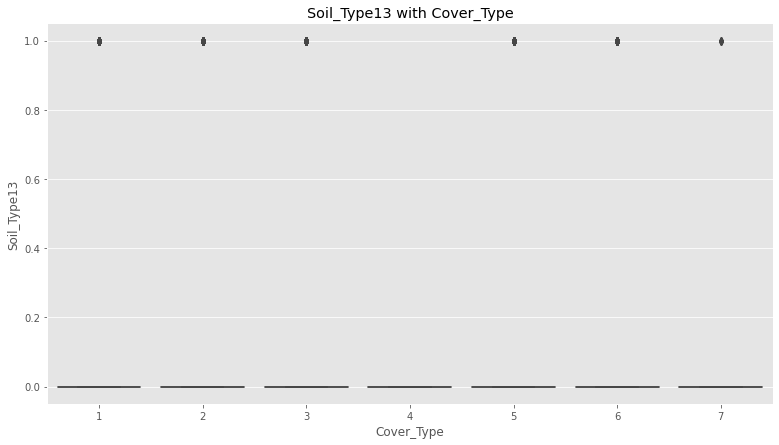

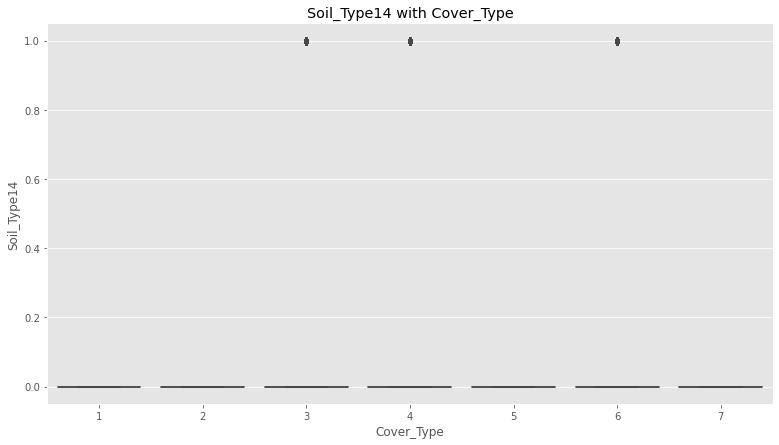

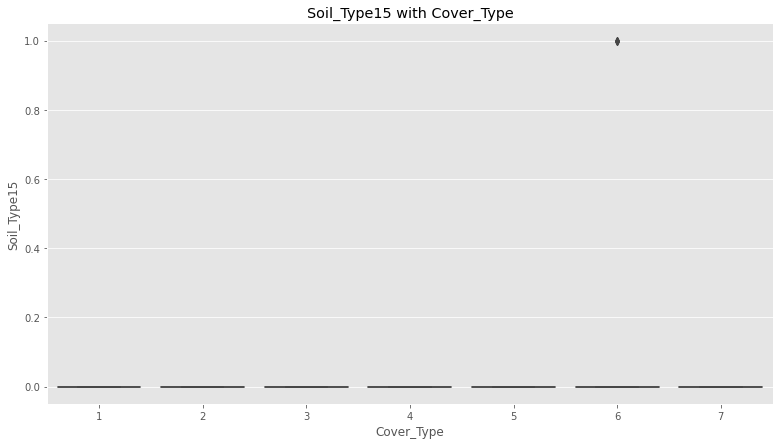

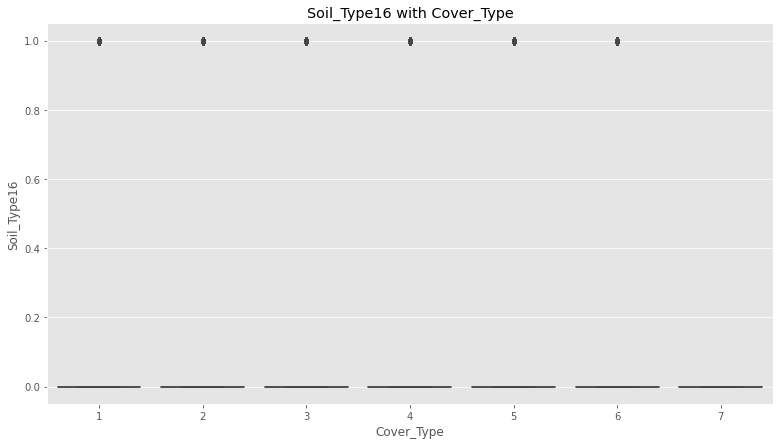

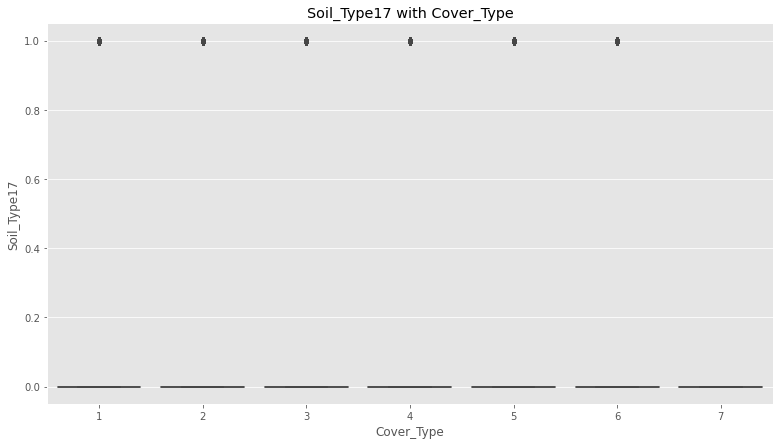

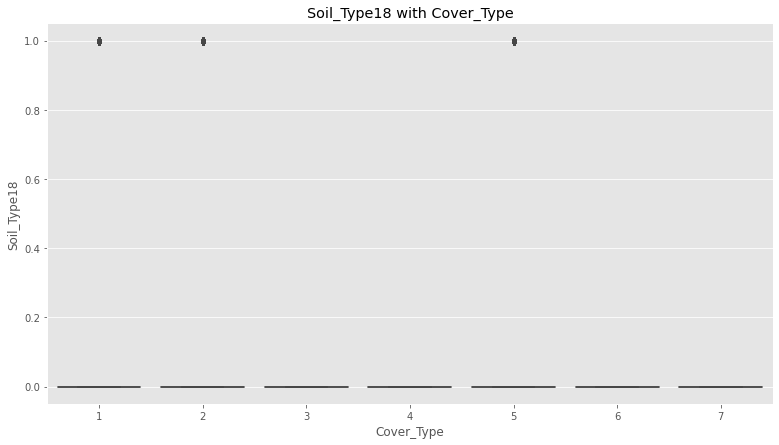

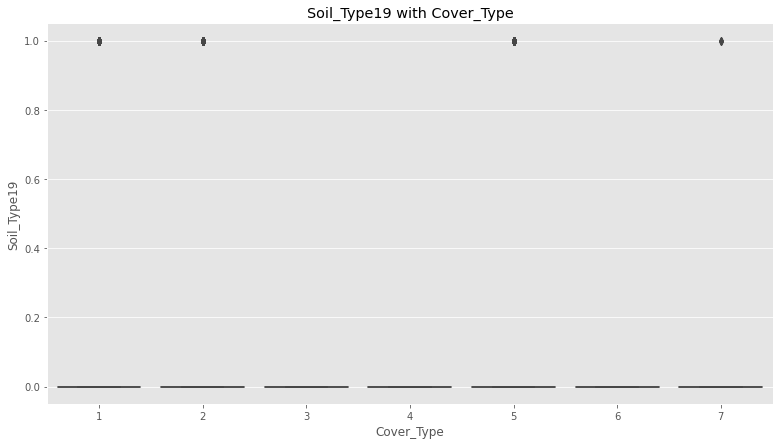

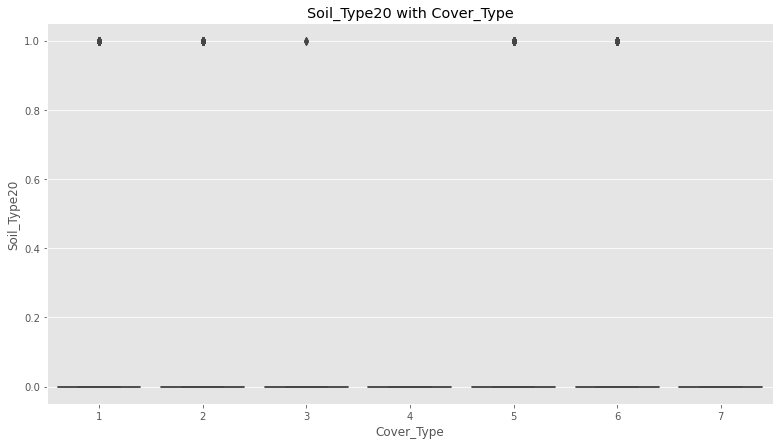

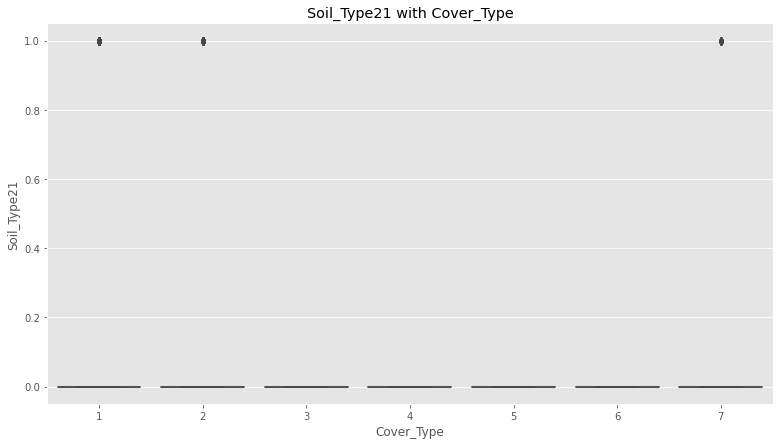

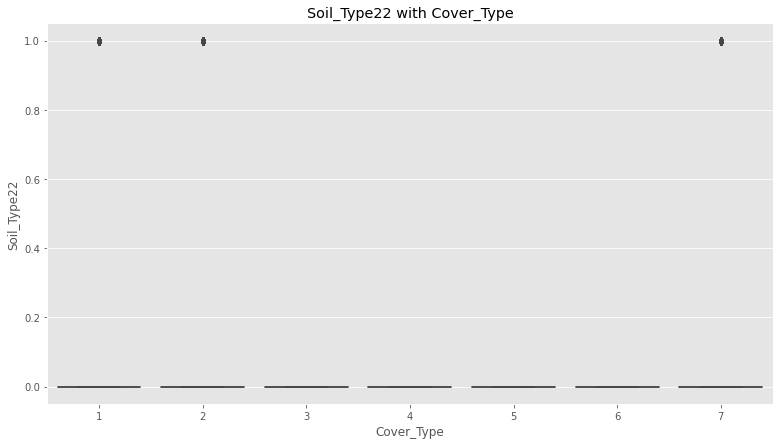

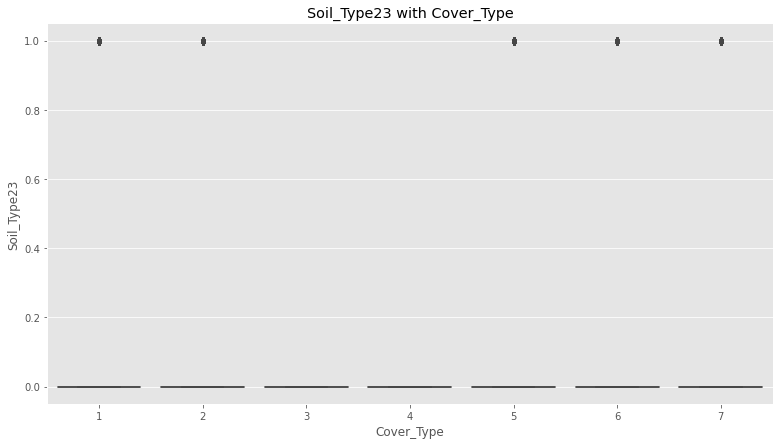

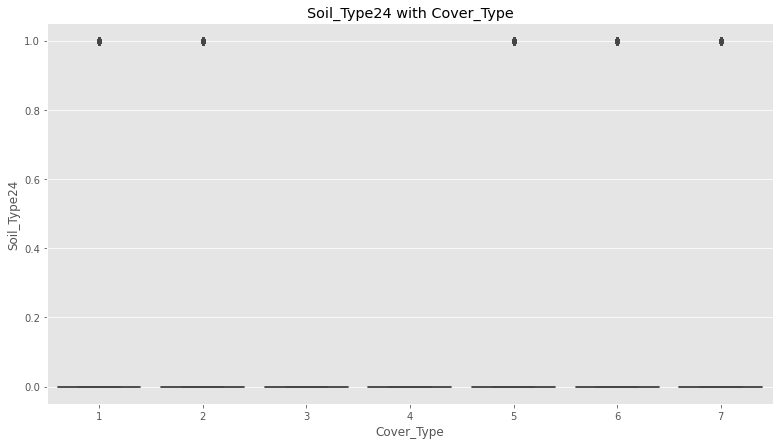

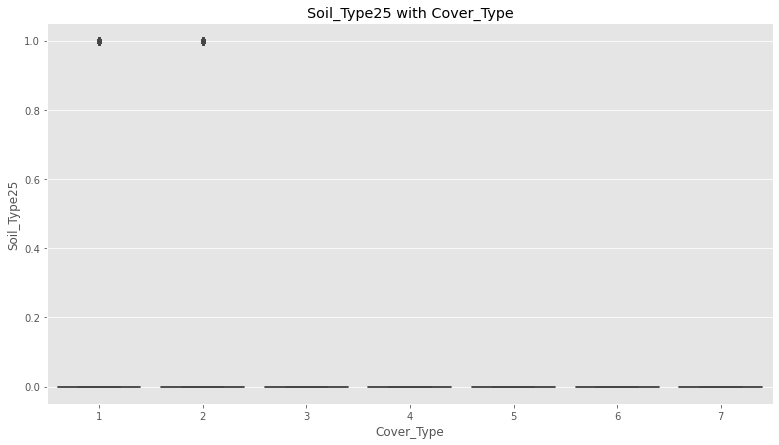

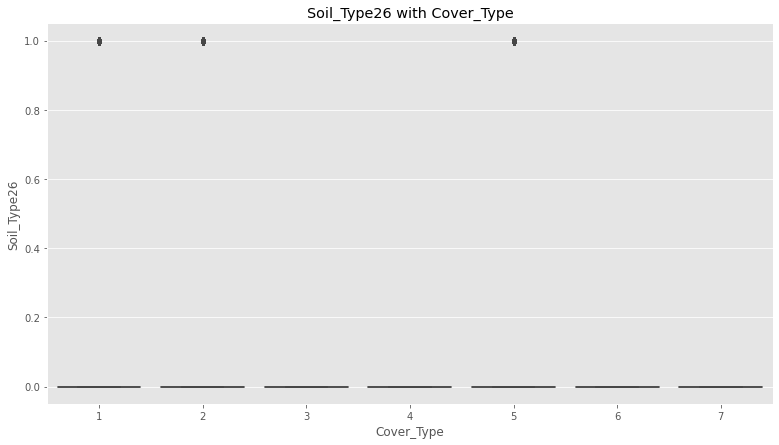

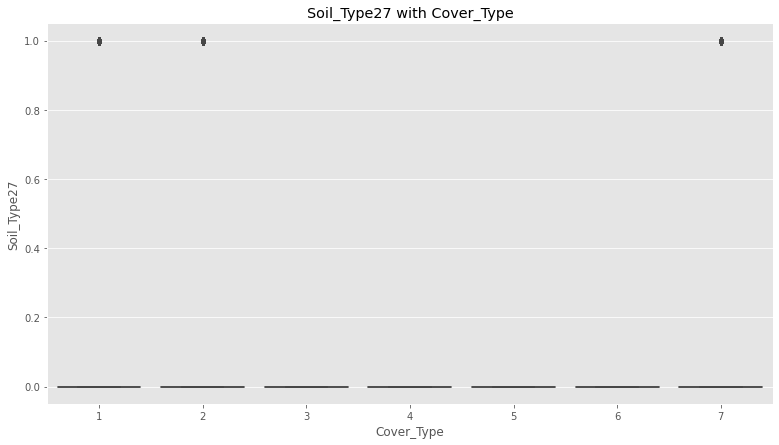

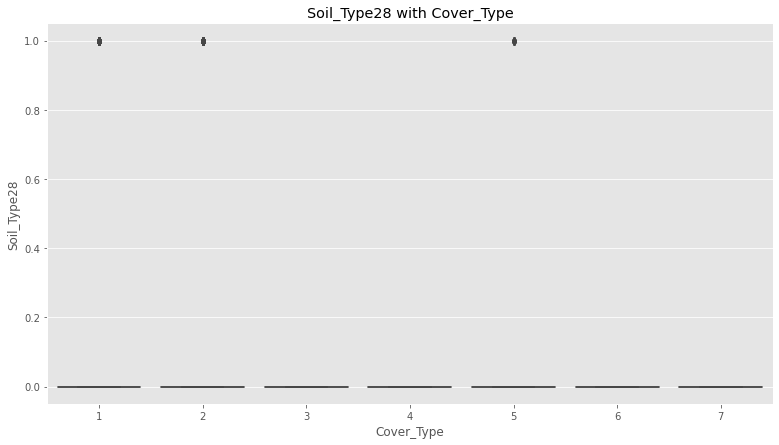

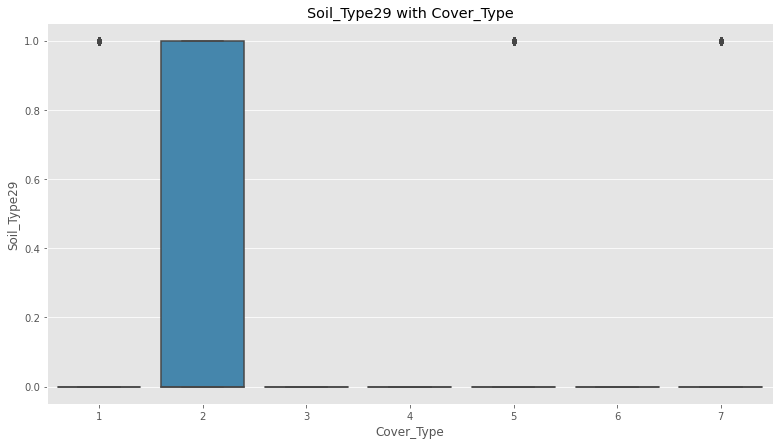

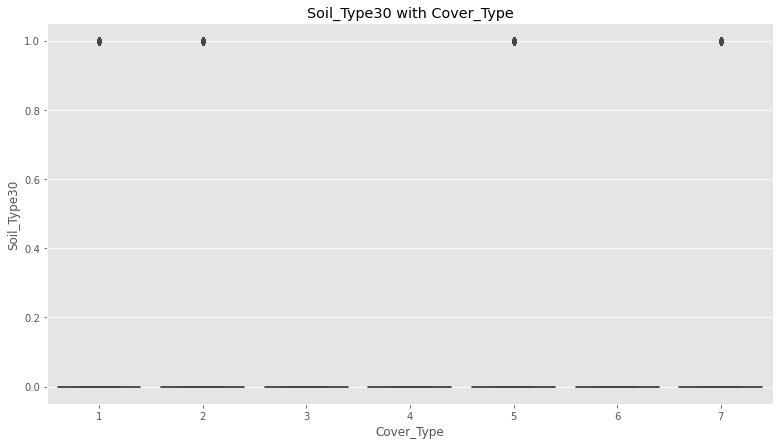

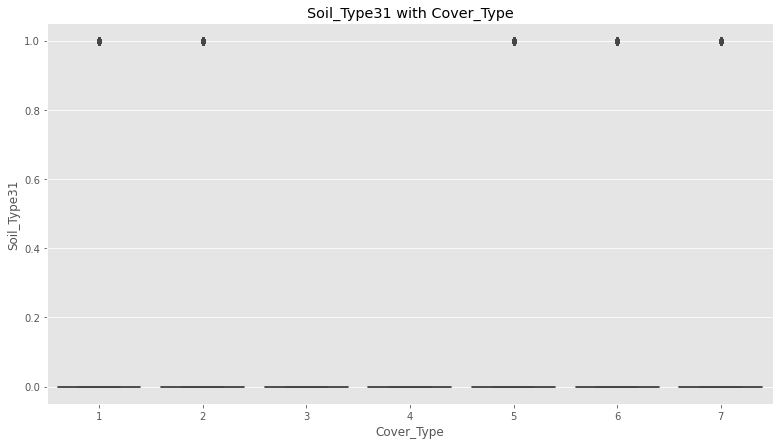

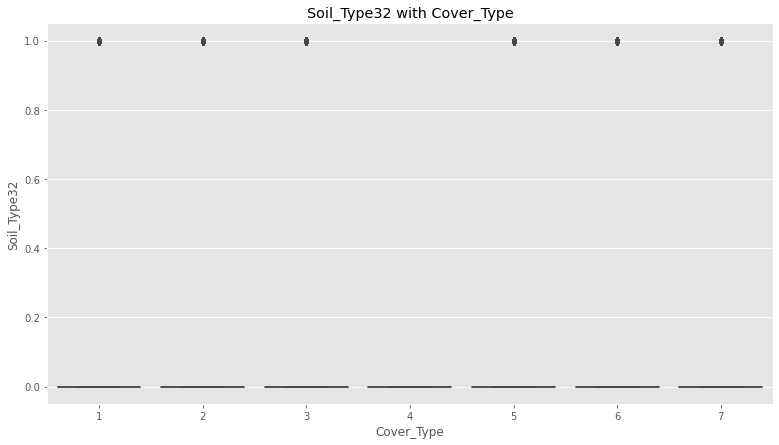

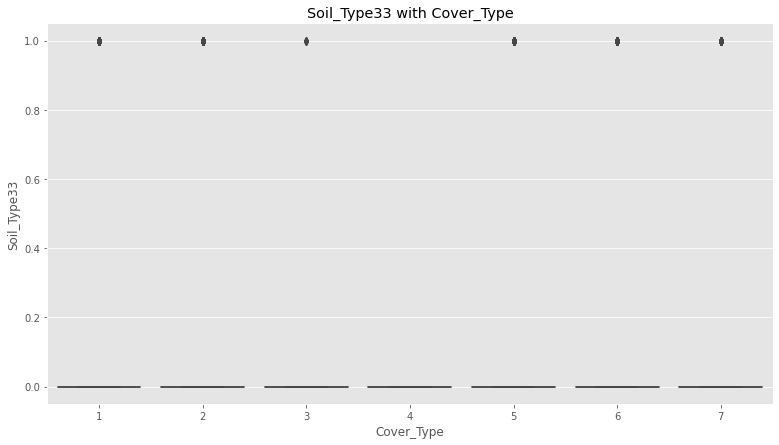

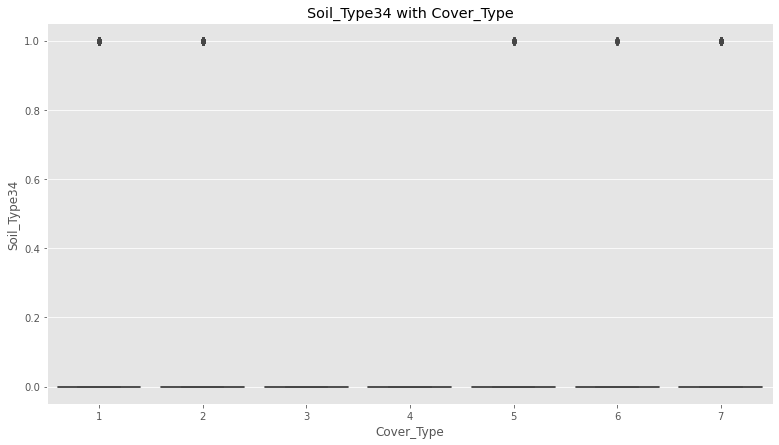

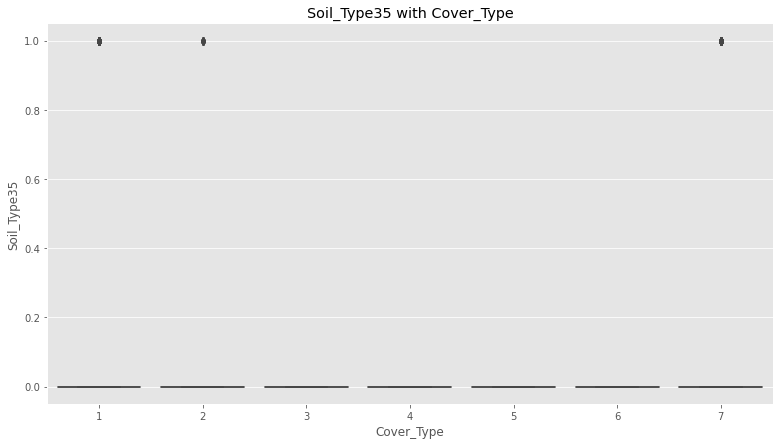

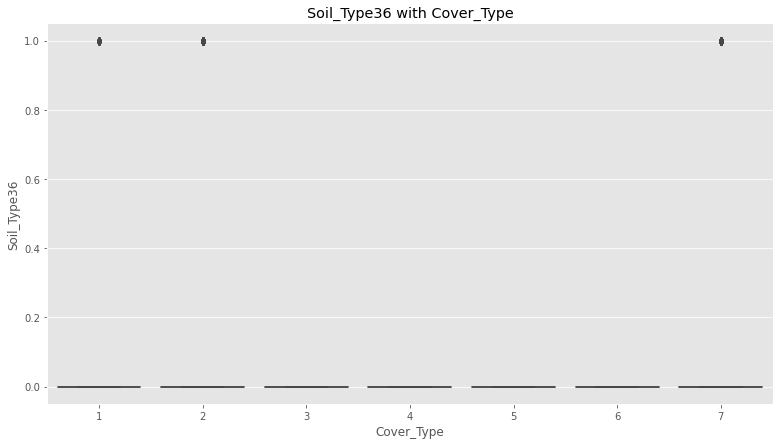

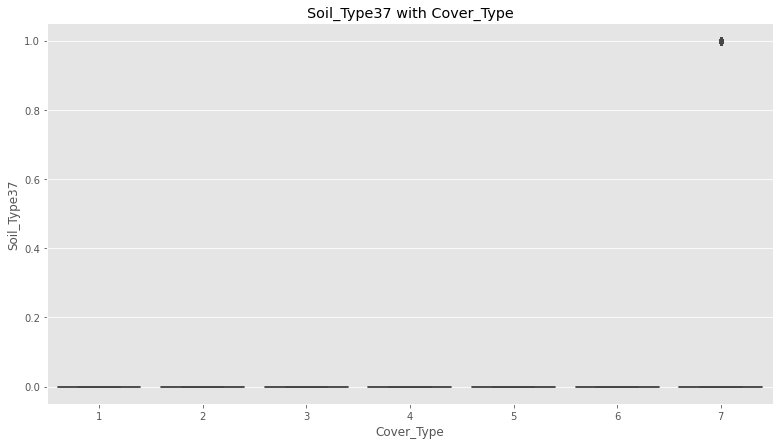

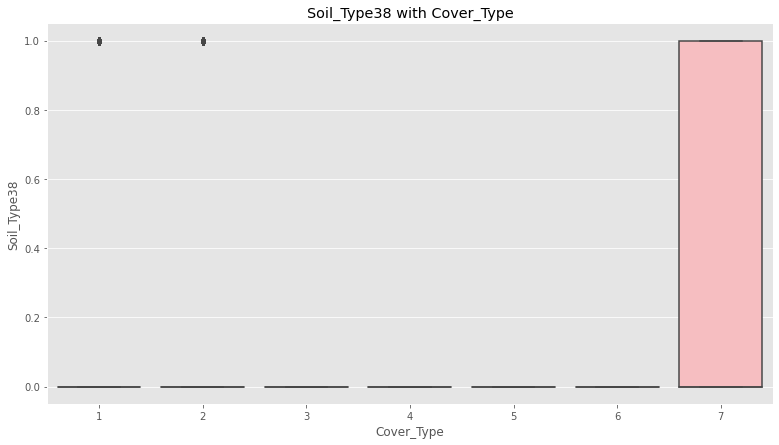

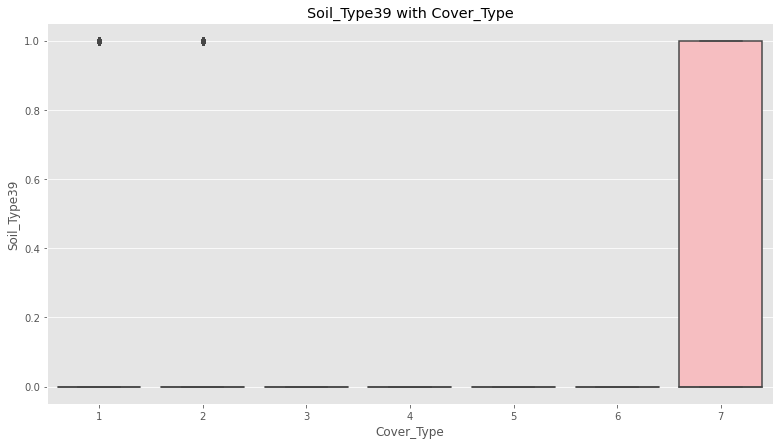

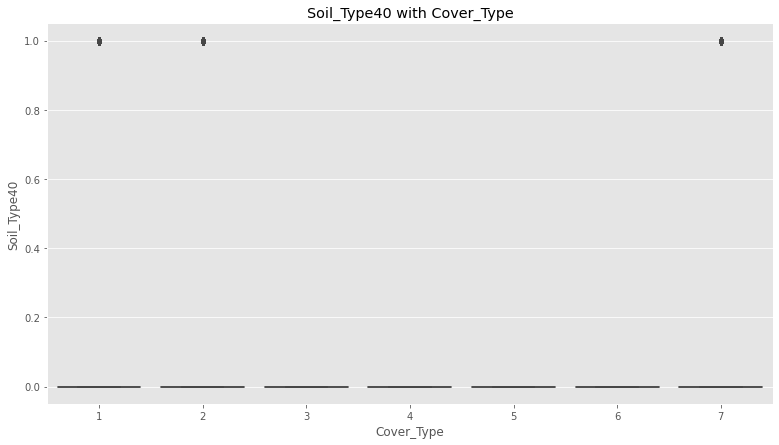

In [30]:
plt.style.use('ggplot')
for i in s_type:
    plt.figure(figsize=(13, 7))
    plt.title(str(i) + " with " + str('Cover_Type'))
    sb.boxplot(x=ff.Cover_Type, y=Soil__viz[i])
    plt.show()

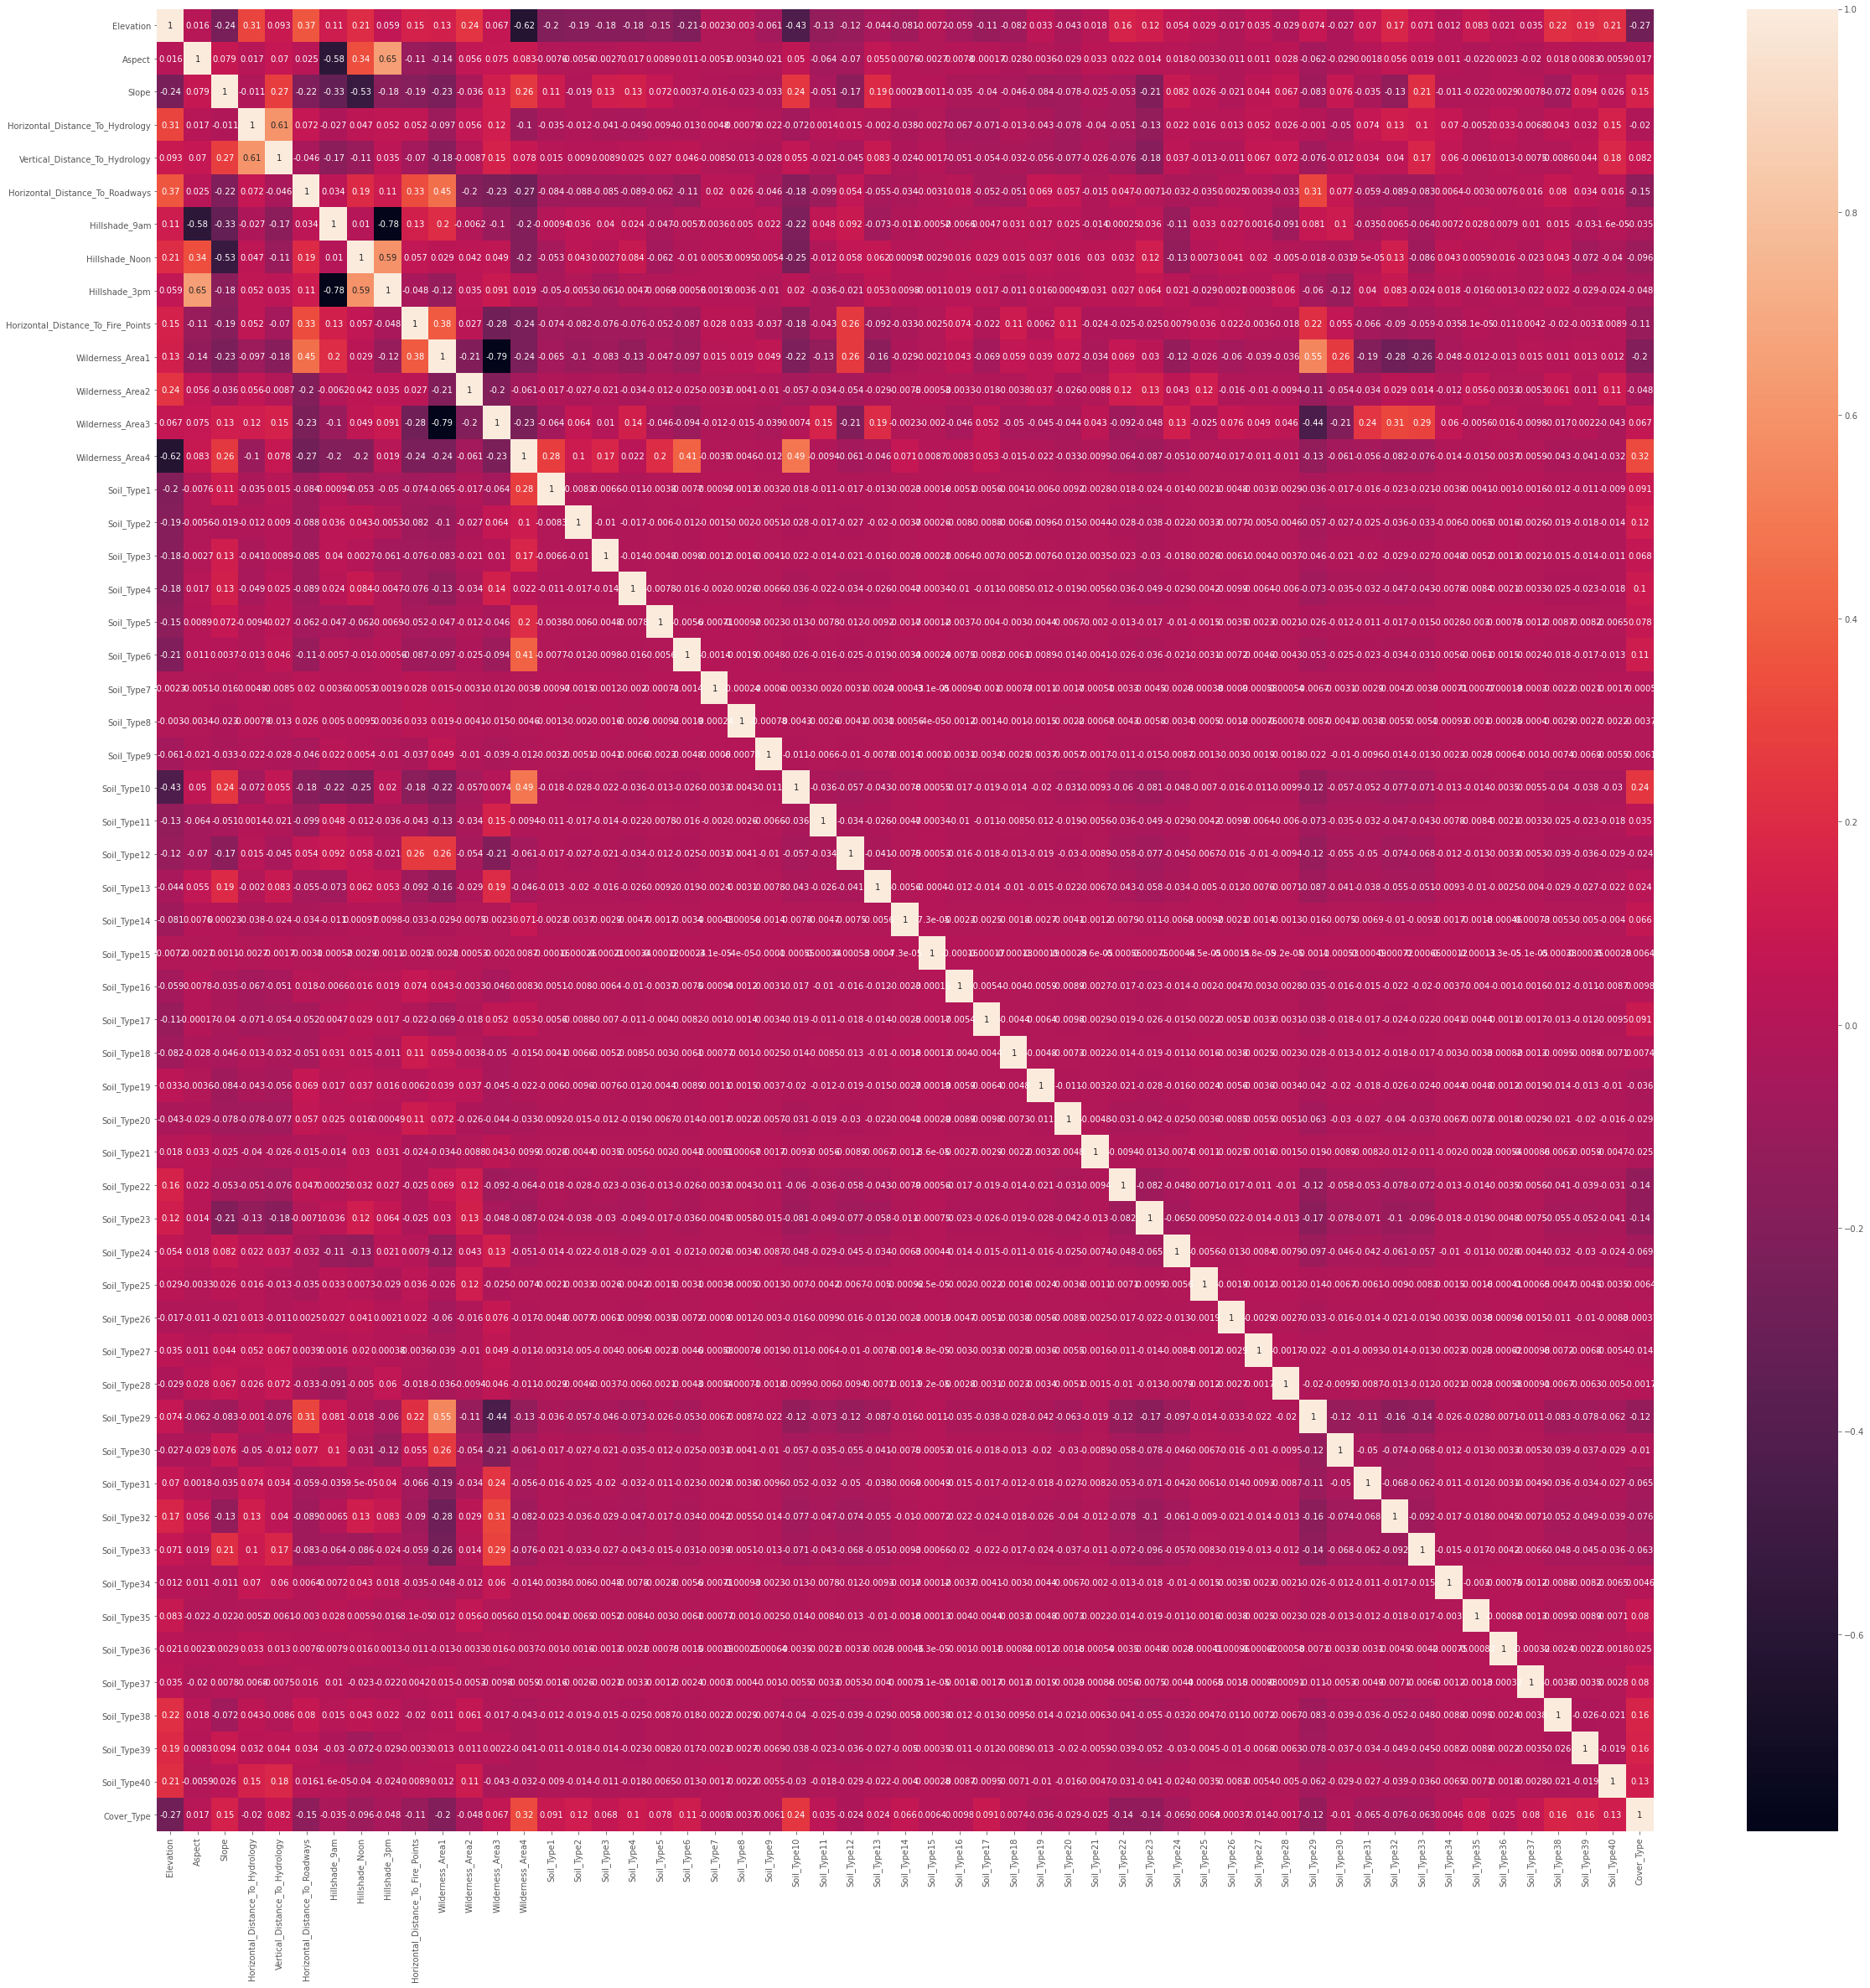

In [33]:
plt.figure(figsize=(40,40))
corr=ff.corr()
sb.heatmap(corr,annot=True)
plt.show()

**Feature Selection using Extra Trees Classifier**

In [38]:
feature = ff.iloc[:, :54] #Features of data
y = ff.iloc[:, 54]  #Target of data

# Features Reduction
ETC = ExtraTreesClassifier()
ETC = ETC.fit(feature, y)

model = SelectFromModel(ETC, prefit=True)
x = model.transform(feature) #new features

In [39]:
y.shape

(581012,)

In [40]:
x.shape

(581012, 12)

**Model Building**

In [45]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=121)

In [49]:

rfc=RandomForestClassifier(n_estimators=100)

In [50]:
rfc_model=rfc.fit(xtrain,ytrain)

In [51]:
ypred=rfc_model.predict(xtest)

**Accuracy**

In [52]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95     52199
           2       0.97      0.94      0.96     72805
           3       0.95      0.94      0.94      8992
           4       0.85      0.91      0.88       665
           5       0.70      0.95      0.81      1764
           6       0.86      0.93      0.90      4032
           7       0.92      0.98      0.95      4796

    accuracy                           0.95    145253
   macro avg       0.89      0.94      0.91    145253
weighted avg       0.95      0.95      0.95    145253



**From The Classification report it is apparent that 1.Spruce/Fir and 2.Lodgepole/Pine are the most susceptible to fires** 